In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# init_notebook_mode(connected=True)

In [ ]:
player_df = pd.read_csv("hw_vis/Players.csv", header=0)


In [ ]:
player_df.head()

Unnamed: 0           Player  height  weight  \
0           0  Curly Armstrong   180.0    77.0   
1           1     Cliff Barker   188.0    83.0   
2           2    Leo Barnhorst   193.0    86.0   
3           3       Ed Bartels   196.0    88.0   
4           4      Ralph Beard   178.0    79.0   

                           collage    born   birth_city birth_state  
0               Indiana University  1918.0          NaN         NaN  
1           University of Kentucky  1921.0     Yorktown     Indiana  
2         University of Notre Dame  1924.0          NaN         NaN  
3  North Carolina State University  1925.0          NaN         NaN  
4           University of Kentucky  1927.0  Hardinsburg    Kentucky

In [ ]:
player_df.rename(columns = {"Unnamed: 0":"ID"}, inplace = True)

In [ ]:
player_df = player_df.dropna()


In [ ]:
player_df.head()

ID           Player  height  weight                 collage    born  \
1   1     Cliff Barker   188.0    83.0  University of Kentucky  1921.0   
4   4      Ralph Beard   178.0    79.0  University of Kentucky  1927.0   
6   6    Charlie Black   196.0    90.0    University of Kansas  1921.0   
7   7      Nelson Bobb   183.0    77.0       Temple University  1924.0   
8   8  Jake Bornheimer   196.0    90.0      Muhlenberg College  1927.0   

      birth_city   birth_state  
1       Yorktown       Indiana  
4    Hardinsburg      Kentucky  
6           Arco         Idaho  
7   Philadelphia  Pennsylvania  
8  New Brunswick    New Jersey

In [ ]:
player_df.describe(include="all")

ID        Player       height       weight  \
count   3189.000000          3189  3189.000000  3189.000000   
unique          NaN          3189          NaN          NaN   
top             NaN  Cliff Barker          NaN          NaN   
freq            NaN             1          NaN          NaN   
mean    2031.380997           NaN   198.663531    94.723424   
std     1061.792662           NaN     9.043461    11.804876   
min        1.000000           NaN   160.000000    60.000000   
25%     1195.000000           NaN   193.000000    86.000000   
50%     2010.000000           NaN   198.000000    95.000000   
75%     2912.000000           NaN   206.000000   102.000000   
max     3919.000000           NaN   231.000000   163.000000   

                       collage         born birth_city birth_state  
count                     3189  3189.000000       3189        3189  
unique                     392          NaN       1108         111  
top     University of Kentucky          NaN    Chicago  California  
freq                        84          NaN        112         337  
mean                       NaN  1964.063656        NaN         NaN  
std                        NaN    18.604145        NaN         NaN  
min                        NaN  1915.000000        NaN         NaN  
25%                        NaN  1952.000000        NaN         NaN  
50%                        NaN  1965.000000        NaN         NaN  
75%                        NaN  1979.000000        NaN         NaN  
max                        NaN  1997.000000        NaN         NaN

In [ ]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3189 entries, 1 to 3919
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           3189 non-null   int64  
 1   Player       3189 non-null   object 
 2   height       3189 non-null   float64
 3   weight       3189 non-null   float64
 4   collage      3189 non-null   object 
 5   born         3189 non-null   float64
 6   birth_city   3189 non-null   object 
 7   birth_state  3189 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 224.2+ KB


In [ ]:
player_df.columns

Index(['ID', 'Player', 'height', 'weight', 'collage', 'born', 'birth_city',
       'birth_state'],
      dtype='object')

In [ ]:
player_df.head()

ID           Player  height  weight                 collage    born  \
1   1     Cliff Barker   188.0    83.0  University of Kentucky  1921.0   
4   4      Ralph Beard   178.0    79.0  University of Kentucky  1927.0   
6   6    Charlie Black   196.0    90.0    University of Kansas  1921.0   
7   7      Nelson Bobb   183.0    77.0       Temple University  1924.0   
8   8  Jake Bornheimer   196.0    90.0      Muhlenberg College  1927.0   

      birth_city   birth_state  
1       Yorktown       Indiana  
4    Hardinsburg      Kentucky  
6           Arco         Idaho  
7   Philadelphia  Pennsylvania  
8  New Brunswick    New Jersey

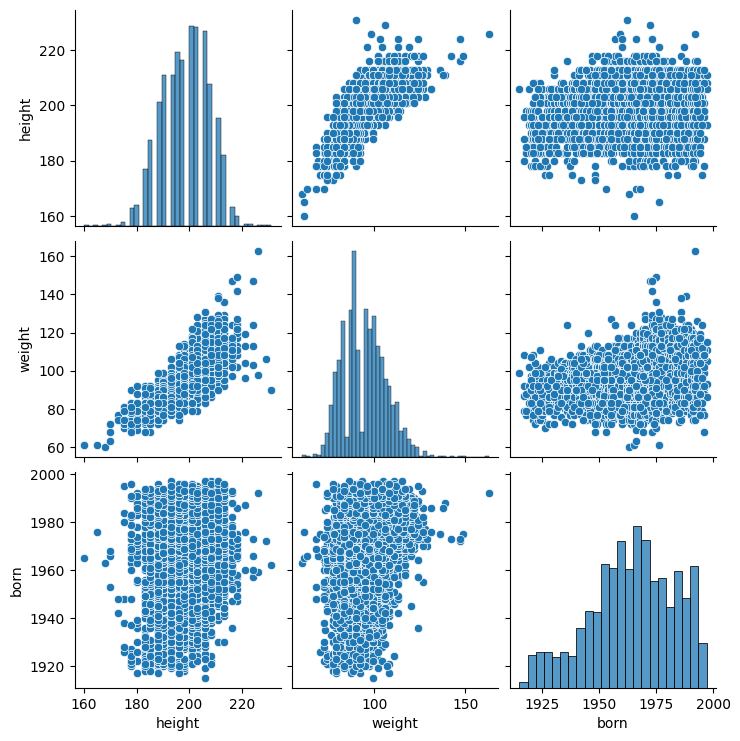

In [ ]:
sns.pairplot(player_df[["height", "weight", "born"]]);

Here I used pairplot and got a scatterplot for born, weight, height. The histograms of the distribution of each variable are placed on the diagonal of the matrix. If we had categories, then this data is not ideal for the future because you can see single points that can be considered outliers

In [ ]:
height_categories = pd.cut(player_df["height"], bins=[160, 180, 200, 220, 240], labels=['160-180', '181-200', '201-220', '221-240'])

In [ ]:
player_df['height_categories'] = height_categories

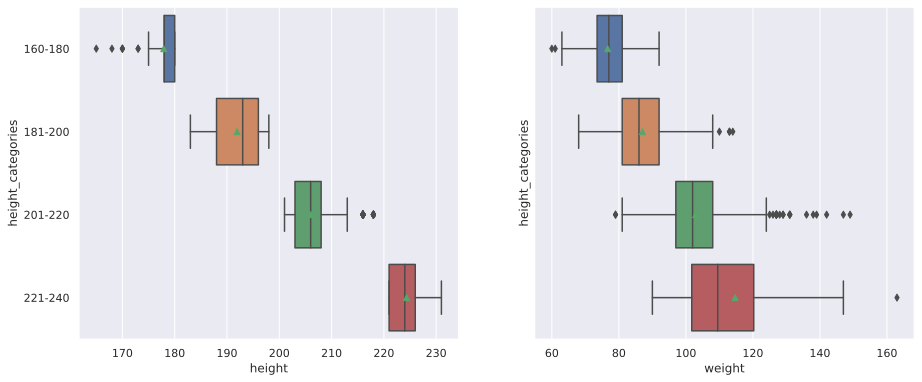

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 6))
sns.boxplot(x="height", y="height_categories", data=player_df, showmeans = True, ax=axes[0]);
sns.boxplot(x="weight", y="height_categories", data=player_df, showmeans = True, ax=axes[1]);

Here there was used a boxplot, which represents the distance between 25 and 75%, in the inner box there is a median and triangle of the mean value. You can see 2 graphs. The first is the ratio of the height category to the height, and the second one is ratio of the weight to the height category. As on the first, as on the second graph there are quite a lot of outlayers which are represented by black rhombuses. We have a veeeery strange result for 160-180, but this is probably due to the fact that there is very little base of people up to 175 that is why such a result. The median line is not exactly in the middle due to an odd number of values in the sample. The triangle mean is also not in the middle due to the asymetric distribution

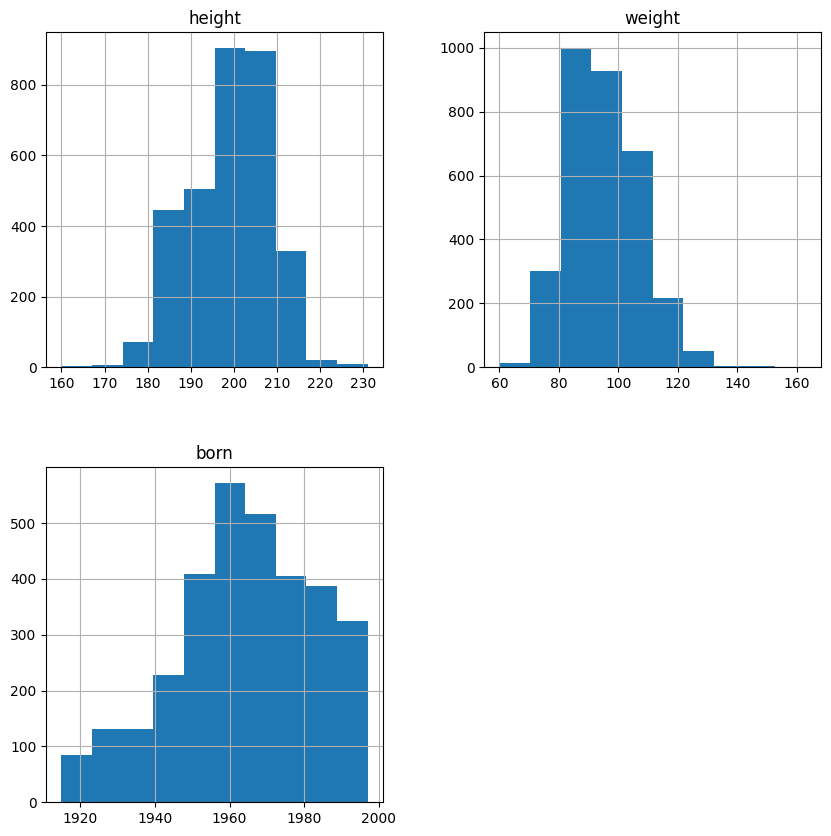

In [ ]:
features = ["height", "weight", "born"]
player_df[features].hist(figsize=(10, 10));

Here I decided to plot histograms of how often a certain height, weight and year of birth occur in the dataset

In [ ]:
stats_df = pd.read_csv("hw_vis/Seasons_Stats.csv")


In [ ]:
stats_df.head()

Unnamed: 0    Year           Player  Pos   Age   Tm     G  GS  MP  PER  \
0           0  1950.0  Curly Armstrong  G-F  31.0  FTW  63.0 NaN NaN  NaN   
1           1  1950.0     Cliff Barker   SG  29.0  INO  49.0 NaN NaN  NaN   
2           2  1950.0    Leo Barnhorst   SF  25.0  CHS  67.0 NaN NaN  NaN   
3           3  1950.0       Ed Bartels    F  24.0  TOT  15.0 NaN NaN  NaN   
4           4  1950.0       Ed Bartels    F  24.0  DNN  13.0 NaN NaN  NaN   

   ...    FT%  ORB  DRB  TRB    AST  STL  BLK  TOV     PF    PTS  
0  ...  0.705  NaN  NaN  NaN  176.0  NaN  NaN  NaN  217.0  458.0  
1  ...  0.708  NaN  NaN  NaN  109.0  NaN  NaN  NaN   99.0  279.0  
2  ...  0.698  NaN  NaN  NaN  140.0  NaN  NaN  NaN  192.0  438.0  
3  ...  0.559  NaN  NaN  NaN   20.0  NaN  NaN  NaN   29.0   63.0  
4  ...  0.548  NaN  NaN  NaN   20.0  NaN  NaN  NaN   27.0   59.0  

[5 rows x 53 columns]

In [ ]:
stats_df.rename(columns = {"Unnamed: 0":"ID"}, inplace = True)

In [ ]:
stats_df = stats_df.dropna(axis=1, how='all')

In [ ]:
stats_df = stats_df.dropna()

In [ ]:
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14585 entries, 5730 to 24690
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      14585 non-null  int64  
 1   Year    14585 non-null  float64
 2   Player  14585 non-null  object 
 3   Pos     14585 non-null  object 
 4   Age     14585 non-null  float64
 5   Tm      14585 non-null  object 
 6   G       14585 non-null  float64
 7   GS      14585 non-null  float64
 8   MP      14585 non-null  float64
 9   PER     14585 non-null  float64
 10  TS%     14585 non-null  float64
 11  3PAr    14585 non-null  float64
 12  FTr     14585 non-null  float64
 13  ORB%    14585 non-null  float64
 14  DRB%    14585 non-null  float64
 15  TRB%    14585 non-null  float64
 16  AST%    14585 non-null  float64
 17  STL%    14585 non-null  float64
 18  BLK%    14585 non-null  float64
 19  TOV%    14585 non-null  float64
 20  USG%    14585 non-null  float64
 21  OWS     14585 non-null  float64


In [ ]:
team_stats_mean = stats_df.groupby('Tm')[['OWS', 'DWS', 'WS']].mean()
team_stats_mean = team_stats_mean.reset_index()
team_stats_mean.columns

Index(['Tm', 'OWS', 'DWS', 'WS'], dtype='object')

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(team_stats_mean, x='OWS', y='DWS', z='WS', color = 'Tm'
              )
fig.show()

Here I decided to plot a 3D scatter plot with Offensive Win Shares, Defensive Win Shares, and Win Shares axes and classified the points by teams (average of each team)

In [ ]:
sns.set()

%config InlineBackend.figure_format = 'svg'


In [ ]:
sns.jointplot(x="ORB", y="DRB", data=stats_df, kind="reg", height=8, ratio=3, marginal_ticks=True, joint_kws={"scatter_kws": {"s": 20, "edgecolors": 'black'}, "line_kws": {"color": 'orange', "alpha": 0.5}});


Here we get the scatterplot and the regression line on it. One can see a few outliers that are very far from the line. And also histograms for DRB and ORB separately

In [ ]:
plt.rcParams["figure.figsize"] = (8, 5)


In [ ]:
stats_df["Age"]  = stats_df["Age"].astype("int")

<Axes: xlabel='Tm'>

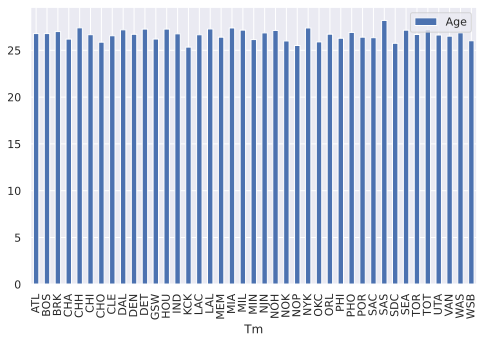

In [ ]:
stats_df[["Tm"] + ["Age"]].groupby("Tm").mean().plot(kind = "bar")

This is a very simple diagram that shows the average age in each team. The difference is enormously small

In [ ]:
player_data_df = pd.read_csv("hw_vis/player_data.csv")

In [ ]:
player_data_df.head()

name  year_start  year_end position height  weight  \
0       Alaa Abdelnaby        1991      1995      F-C   6-10   240.0   
1      Zaid Abdul-Aziz        1969      1978      C-F    6-9   235.0   
2  Kareem Abdul-Jabbar        1970      1989        C    7-2   225.0   
3   Mahmoud Abdul-Rauf        1991      2001        G    6-1   162.0   
4    Tariq Abdul-Wahad        1998      2003        F    6-6   223.0   

         birth_date                                college  
0     June 24, 1968                        Duke University  
1     April 7, 1946                  Iowa State University  
2    April 16, 1947  University of California, Los Angeles  
3     March 9, 1969             Louisiana State University  
4  November 3, 1974              San Jose State University

In [ ]:
player_data_df = player_data_df.dropna()

In [ ]:
player_data_df.isnull().values.any()
player_data_df['height'] = player_data_df['height'].str.replace('-', '.')
player_data_df['height'] = player_data_df['height'].astype("float")

In [ ]:
player_data_df.head()

name  year_start  year_end position  height  weight  \
0       Alaa Abdelnaby        1991      1995      F-C     6.1   240.0   
1      Zaid Abdul-Aziz        1969      1978      C-F     6.9   235.0   
2  Kareem Abdul-Jabbar        1970      1989        C     7.2   225.0   
3   Mahmoud Abdul-Rauf        1991      2001        G     6.1   162.0   
4    Tariq Abdul-Wahad        1998      2003        F     6.6   223.0   

         birth_date                                college  
0     June 24, 1968                        Duke University  
1     April 7, 1946                  Iowa State University  
2    April 16, 1947  University of California, Los Angeles  
3     March 9, 1969             Louisiana State University  
4  November 3, 1974              San Jose State University

In [ ]:
player_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4213 entries, 0 to 4549
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        4213 non-null   object 
 1   year_start  4213 non-null   int64  
 2   year_end    4213 non-null   int64  
 3   position    4213 non-null   object 
 4   height      4213 non-null   float64
 5   weight      4213 non-null   float64
 6   birth_date  4213 non-null   object 
 7   college     4213 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 296.2+ KB


<Axes: xlabel='height', ylabel='weight'>

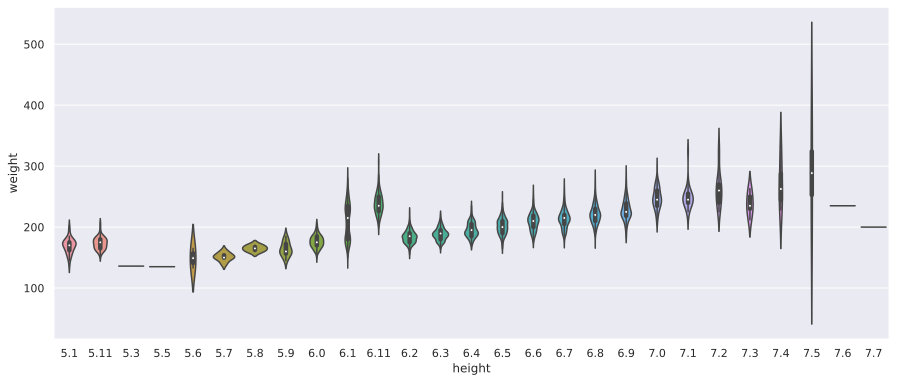

In [ ]:
sns.set(rc = {'figure.figsize':(15,6)})

sns.violinplot(player_data_df, x="height", y="weight", fill=False)


Here I used violin, which is analogous to boxplot, but it depicts the form of data distribution. In my understanding, there are too narrow of them outliers, which are height 7.5, 7.4

In [ ]:
sns.relplot( data=player_data_df, x="weight", y="height", hue="position", size="weight",
            sizes=(40, 500), alpha=.5, palette="muted", height=6)

Here I used relplot to plot the relationship between height and weight. The points have different color and size depending on the position and weight respectively. You can already see outliers, for example, ones what have weight>300, weight<160, height<5.5, height>7.4 and not only that, because there are separate points in the wrong range, for example (height = 6.1 & weight>230)

<Axes: xlabel='position', ylabel='count'>

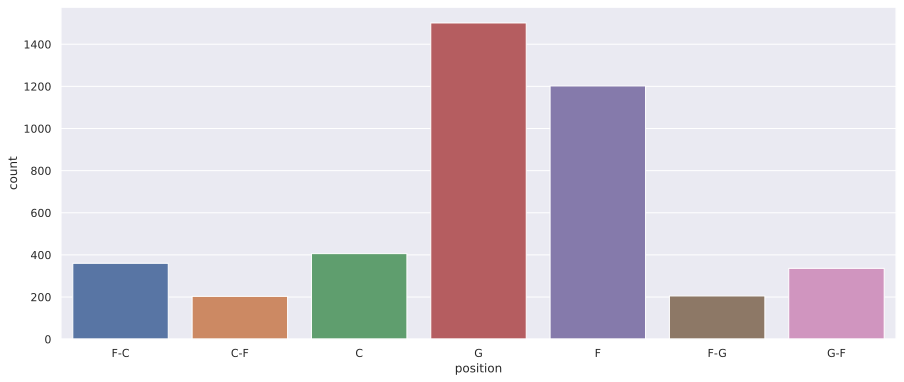

In [ ]:
sns.countplot(x="position", data=player_data_df)



This graph is quite simple, because here you can see the position and its quantity. The middle position is the most common which is logical

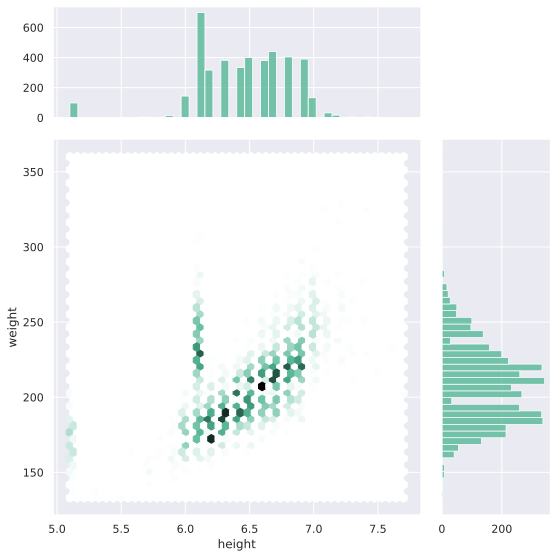

In [ ]:
sns.jointplot(data=player_data_df,  x='height', y='weight', kind="hex", height=8, ratio=3, color="#4CB391", marginal_ticks=True)


Here I have drawn a hexagonal graph. The relationship between weight and height. As we can see, players with a height of 6.1 have many outliers, also outliers: height>7.0, height<5.7, weight> 260, weight<165
